In [1]:
# 라이브러리 임포트 
import numpy as np
import pandas as pd

# 시각화 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline

# 한글폰트 처리 
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
import plotly.express as px
import plotly.graph_objects as go

### Seaborn
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- https://seaborn.github.io/
- http://seaborn.pydata.org/

### Seaborn용 데이타셋 활용

- sns.load_dataset()
- https://github.com/mwaskom/seaborn-data

```
iris = sns.load_dataset("iris") # 붓꽃 데이터 
titanic = sns.load_dataset("titanic") # 타이타닉호 데이터 
tips = sns.load_dataset("tips") # 팁 데이터 
flights = sns.load_dataset("flights") # 여객운송 데이터 
penguins = sns.load_dataset("penguins") # 펭귄
```

### tips 데이타셋 활요
- 레스토랑의 팁 데이타

In [3]:
# 데이타프레임으로 저장
df_tips = sns.load_dataset('tips')
df_tips.shape

(244, 7)

In [4]:
df_tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
14,14.83,3.02,Female,No,Sun,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
130,19.08,1.50,Male,No,Thur,Lunch,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [7]:
#데이터 결측치와 
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
# 볌주형 데이타의 값 확인
print(df_tips['sex'].value_counts())
print()
print(df_tips['day'].value_counts())
print()
print(df_tips['time'].value_counts())
print()
print(df_tips['size'].value_counts())
print()
print(df_tips['smoker'].value_counts())

Male      157
Female     87
Name: sex, dtype: int64

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Dinner    176
Lunch      68
Name: time, dtype: int64

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

No     151
Yes     93
Name: smoker, dtype: int64


In [9]:
# print(df_tips['total_bill'].value_counts())
print(df_tips['tip'].value_counts())

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64


### histplot()
- 수치형데이타의 히스토그램
- sns.그래프명(x=컬럼명1, y=컬럼명2, data=데이타프레임, 옵션)
- sns.histplot(x=컬럼명1, y=컬럼명2, data=데이타프레임)

      tip
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
..    ...
239  5.92
240  2.00
241  2.00
242  1.75
243  3.00

[244 rows x 1 columns]



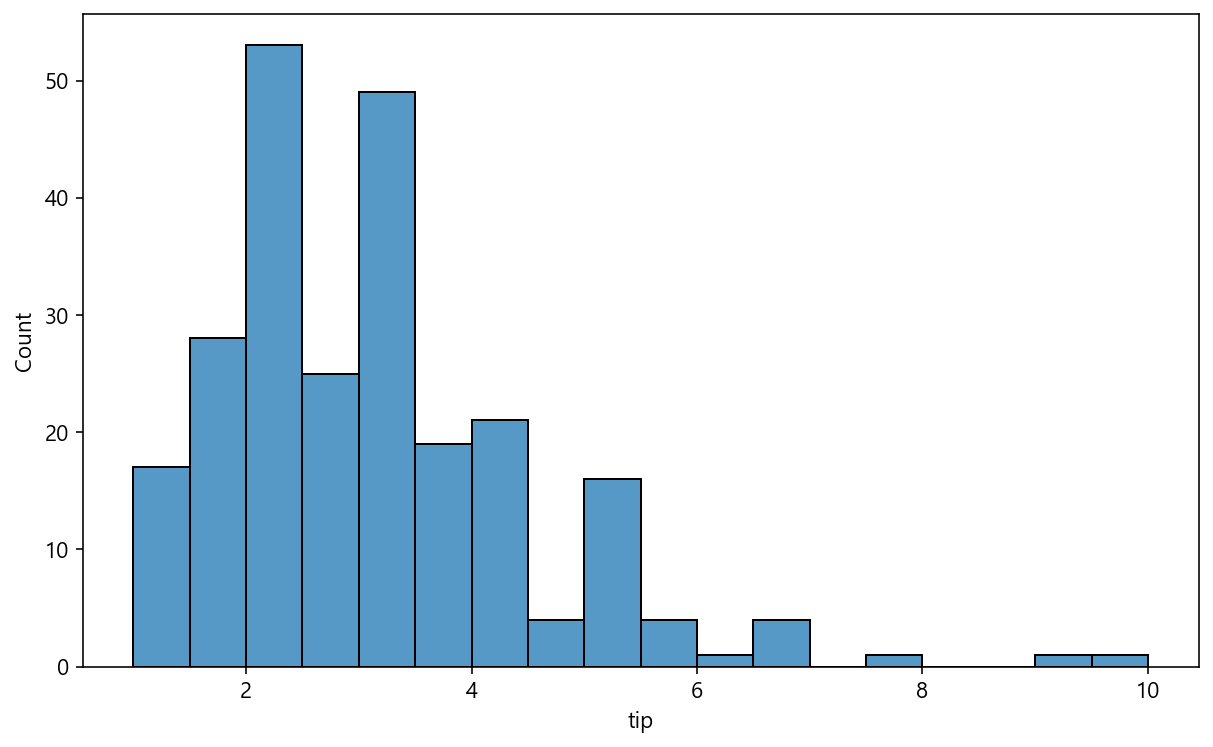

In [10]:
# tips 컬럼의 히스토그램
print(df_tips[['tip']])
print()
sns.histplot(x='tip', data=df_tips);

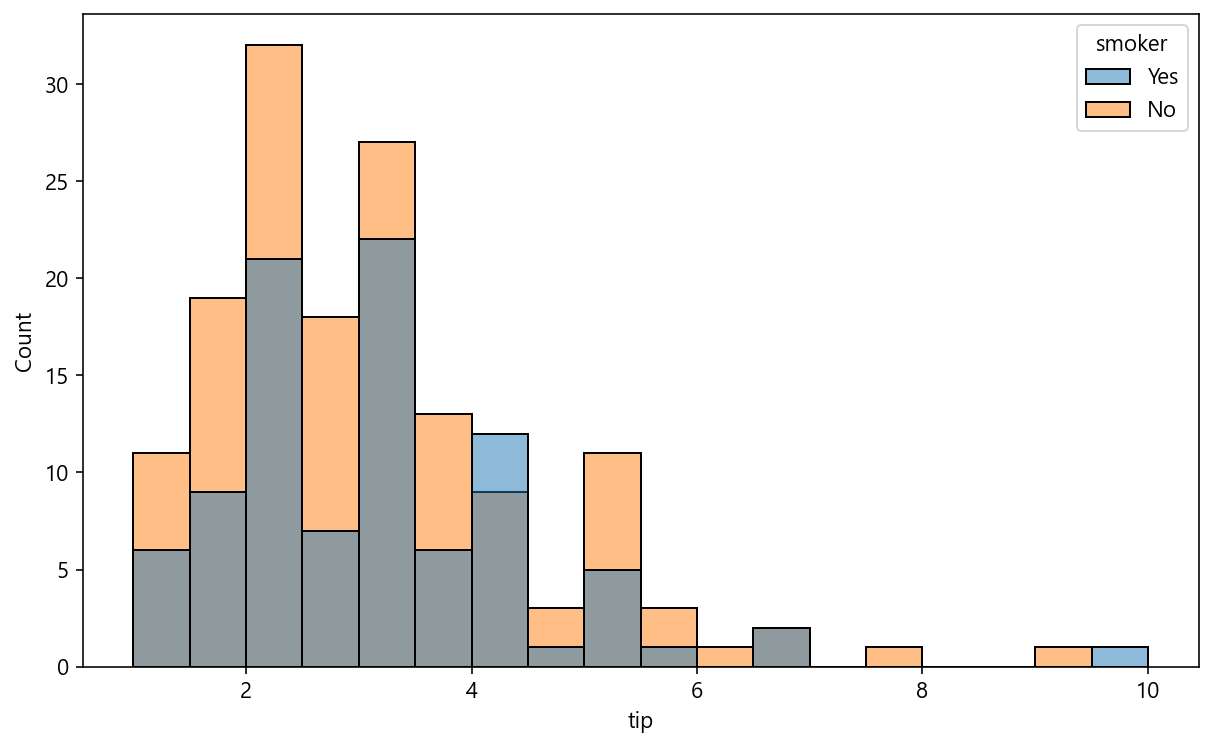

In [11]:
# histplot() + hue
sns.histplot(x='tip', data=df_tips, hue='smoker');

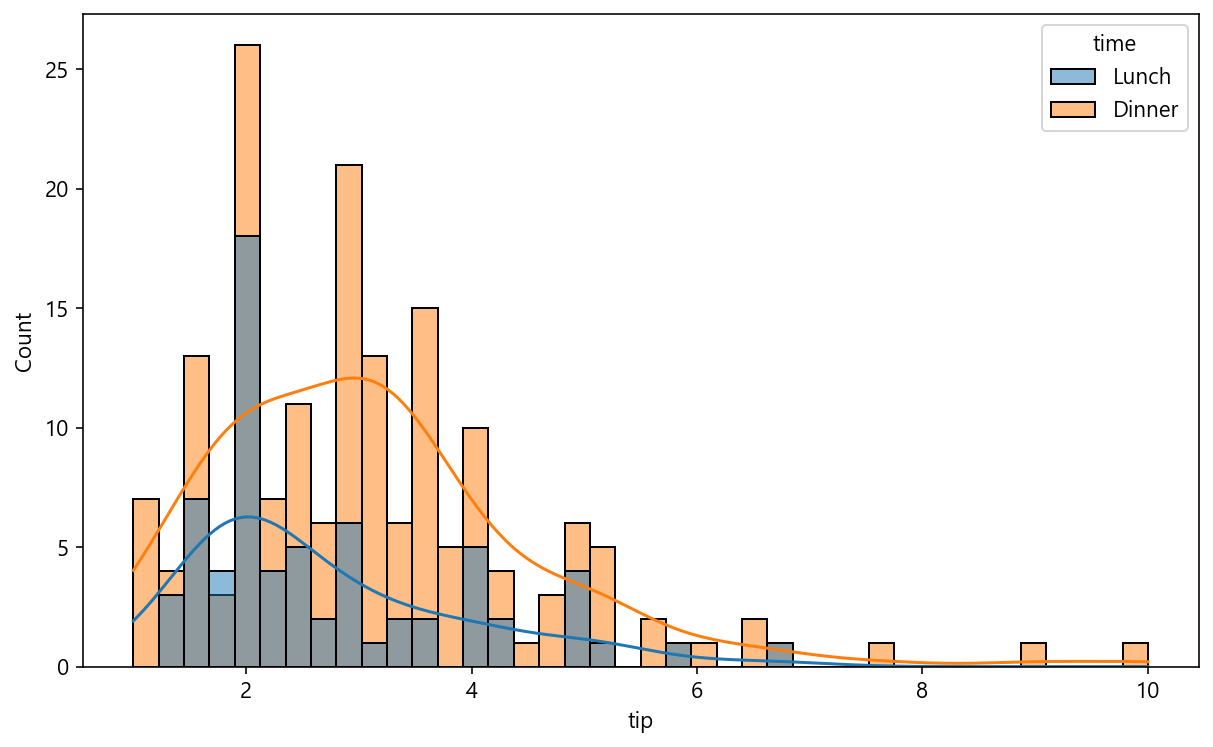

In [12]:
# histplot() + hue + kde
sns.histplot(x='tip', data=df_tips, hue='time', kde=True, bins=40);

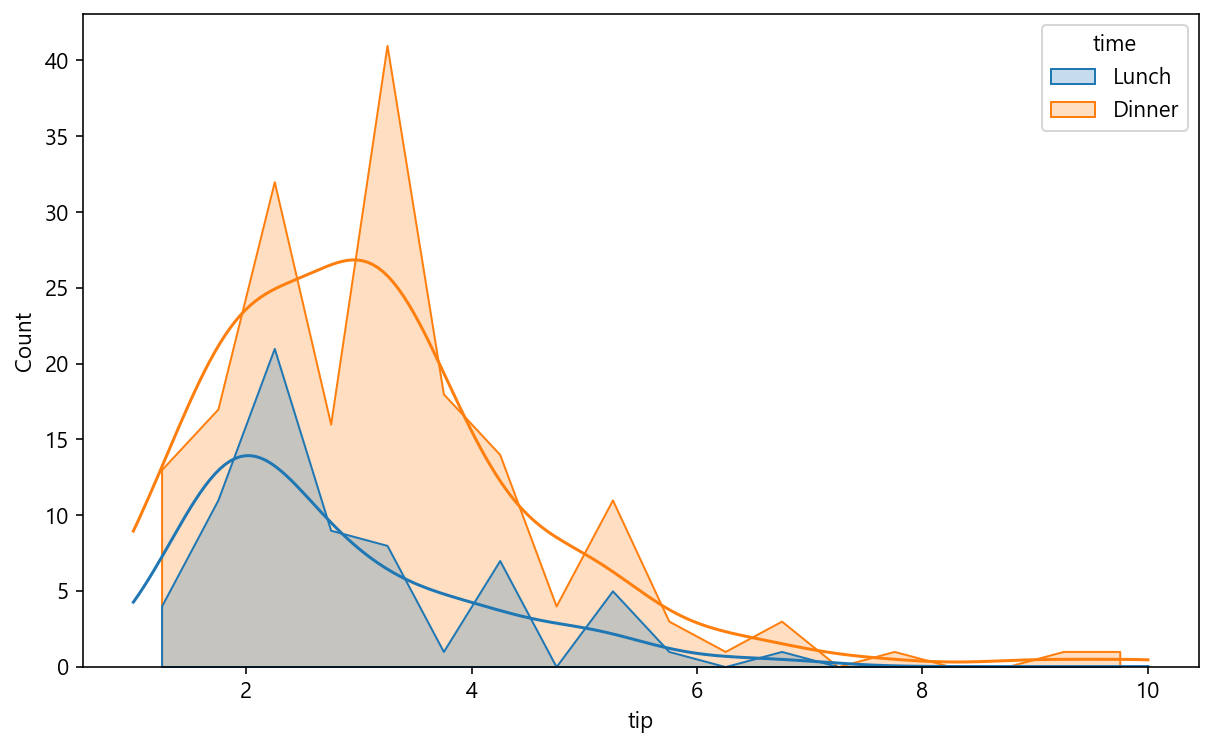

In [13]:
# histplot() + hue + kde + bins
sns.histplot(x='tip', data=df_tips, hue='time', kde=True, element='poly');

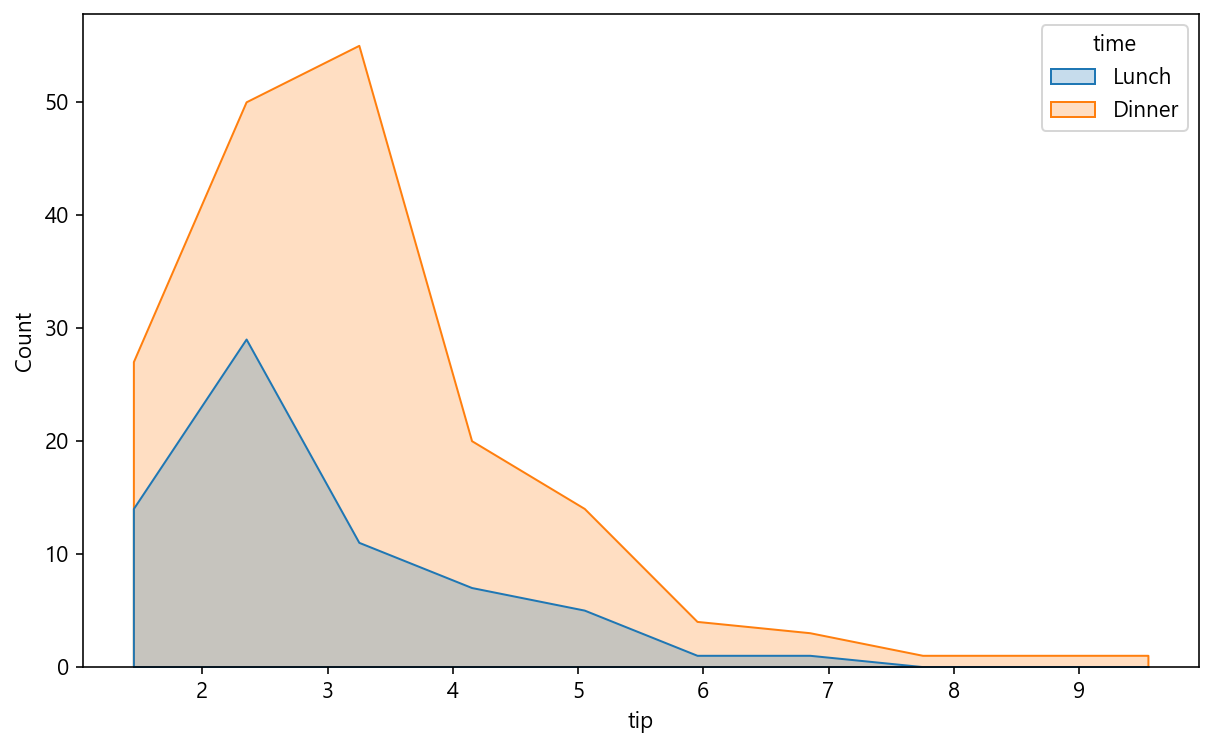

In [14]:
# histplot() + hue +  + bins
# element : {"bars", "step", "poly"}
sns.histplot(x='tip', data=df_tips, hue='time', bins=10, element='poly');

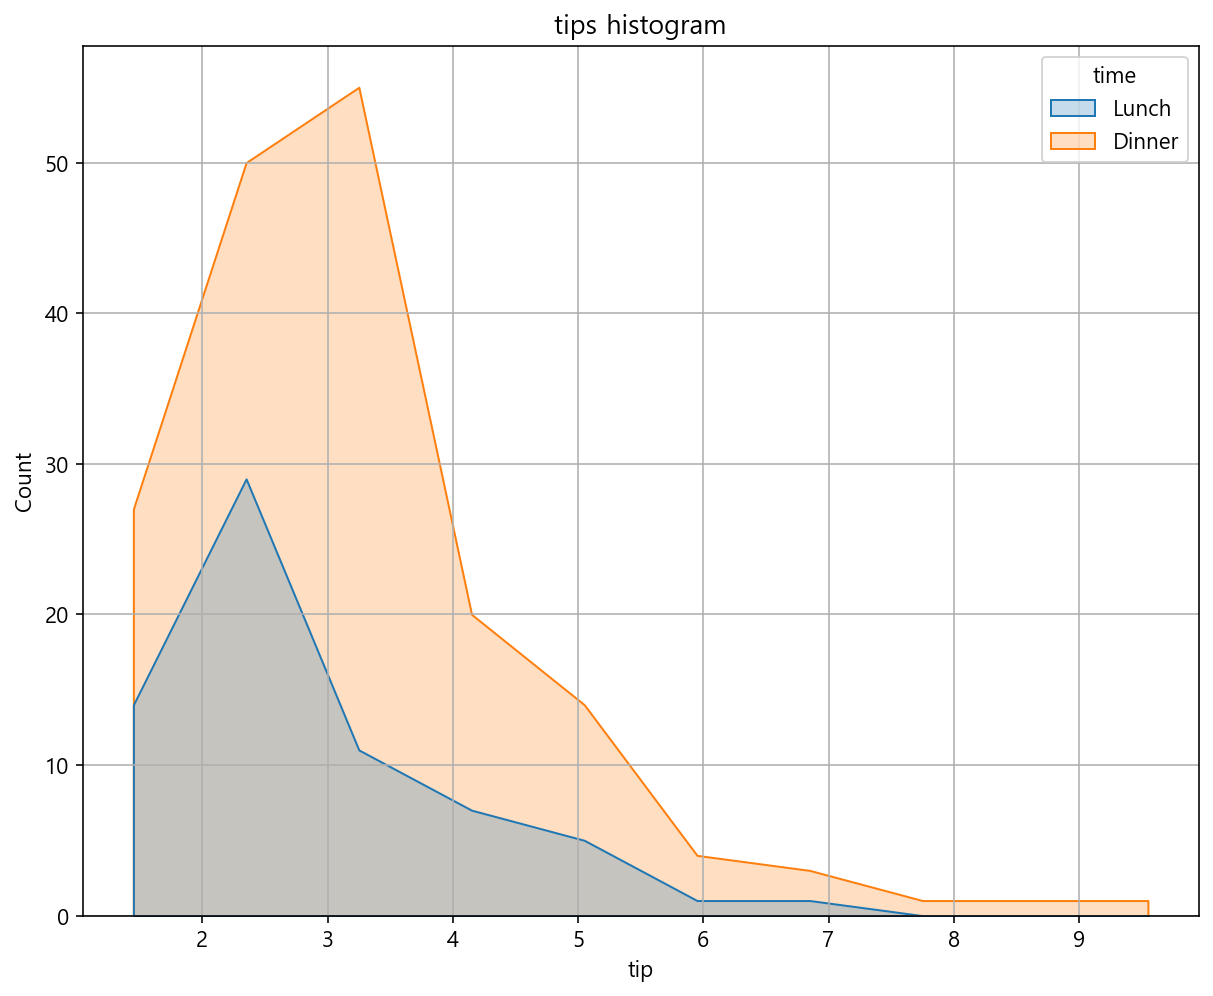

In [15]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('tips histogram')
sns.histplot(x='tip', data=df_tips, hue='time', bins=10, element='poly')
plt.savefig('output/tips_histogram.png')
plt.show()

### 서브플랏 스타일로 히스토그램 그래프 배치

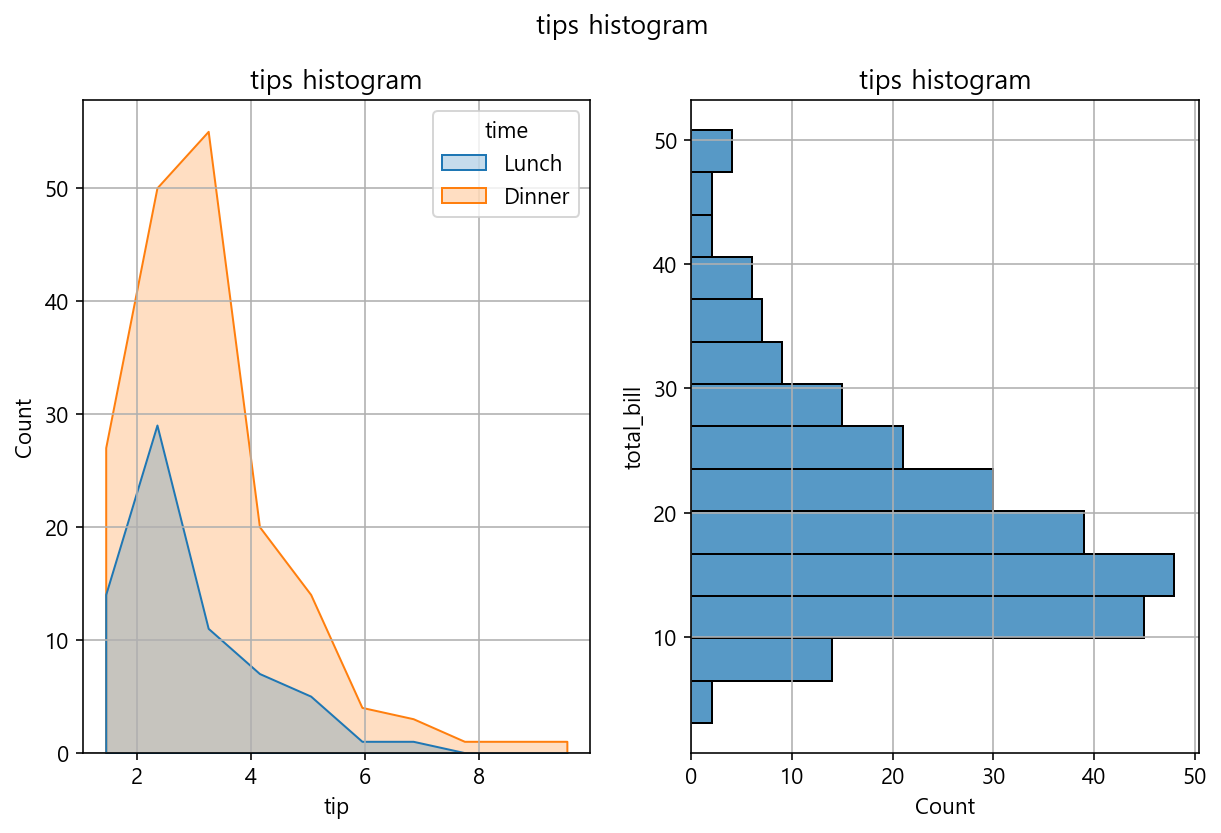

In [16]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.title('tips histogram')
sns.histplot(x='tip', data=df_tips, hue='time', bins=10, element='poly')
plt.grid()

plt.subplot(122)
plt.title('tips histogram')
sns.histplot(y='total_bill', data=df_tips)

plt.suptitle('tips histogram')
plt.grid()
plt.show()

### sns.countplot()
- sns.countplot(컬럼명, data=데이타프레임, 옵션=값)
- 범주형 데이타에서 사용.

In [57]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
df_tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [18]:
df_tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [19]:
sns.countplot?

Signature:
sns.countplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determine how the data are plotted.
- A "wide-form" DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

In most cases, it 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64



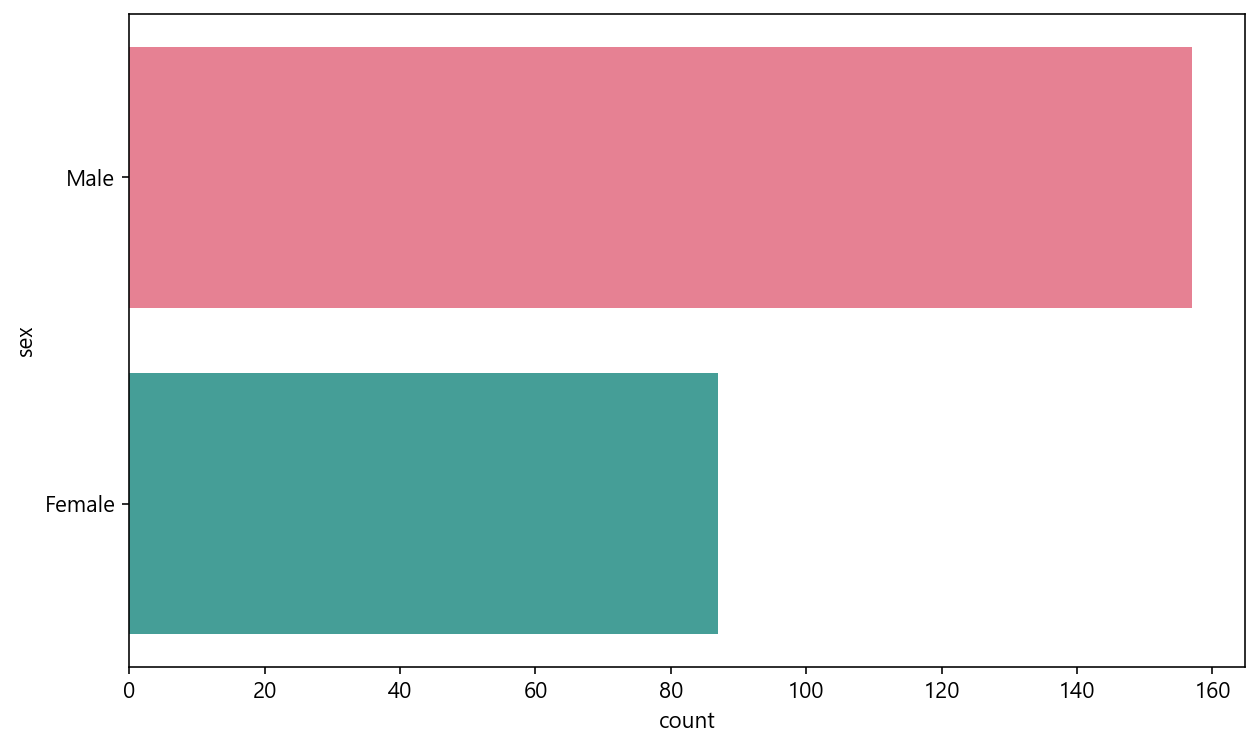

In [20]:
# day 컬럼의 막대 그래프 
print(df_tips['day'].value_counts())
print()
sns.countplot(y='sex', data=df_tips, palette="husl");

### 펭귄 데이타셋

In [21]:
df_penguins = sns.load_dataset("penguins")
df_penguins.shape

(344, 7)

In [22]:
df_penguins.sample(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male
323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,Male


In [23]:
# 범주형 데이타 확인
print(df_penguins['species'].unique())
print(df_penguins['island'].unique())
print(df_penguins['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


In [24]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
# 결측 데이타 확인
df_penguins[df_penguins['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [26]:
df_penguins[df_penguins['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [27]:
# 2개의 결측 데이타 삭제
df_penguins.drop(index=[3,339], inplace=True)

In [28]:
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [29]:
df_penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [30]:
# sex 값이 NaN => '-'
df_penguins['sex'].fillna(value='-', inplace=True)

In [31]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [32]:
df_penguins['sex'].isnull().sum()

0

### sns.scatterplot()

In [33]:
sns.scatterplot?

Signature:
sns.scatterplot(
    *,
    x=None,
    y=None,
    hue=None,
    style=None,
    size=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    x_bins=None,
    y_bins=None,
    units=None,
    estimator=None,
    ci=95,
    n_boot=1000,
    alpha=None,
    x_jitter=None,
    y_jitter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue``

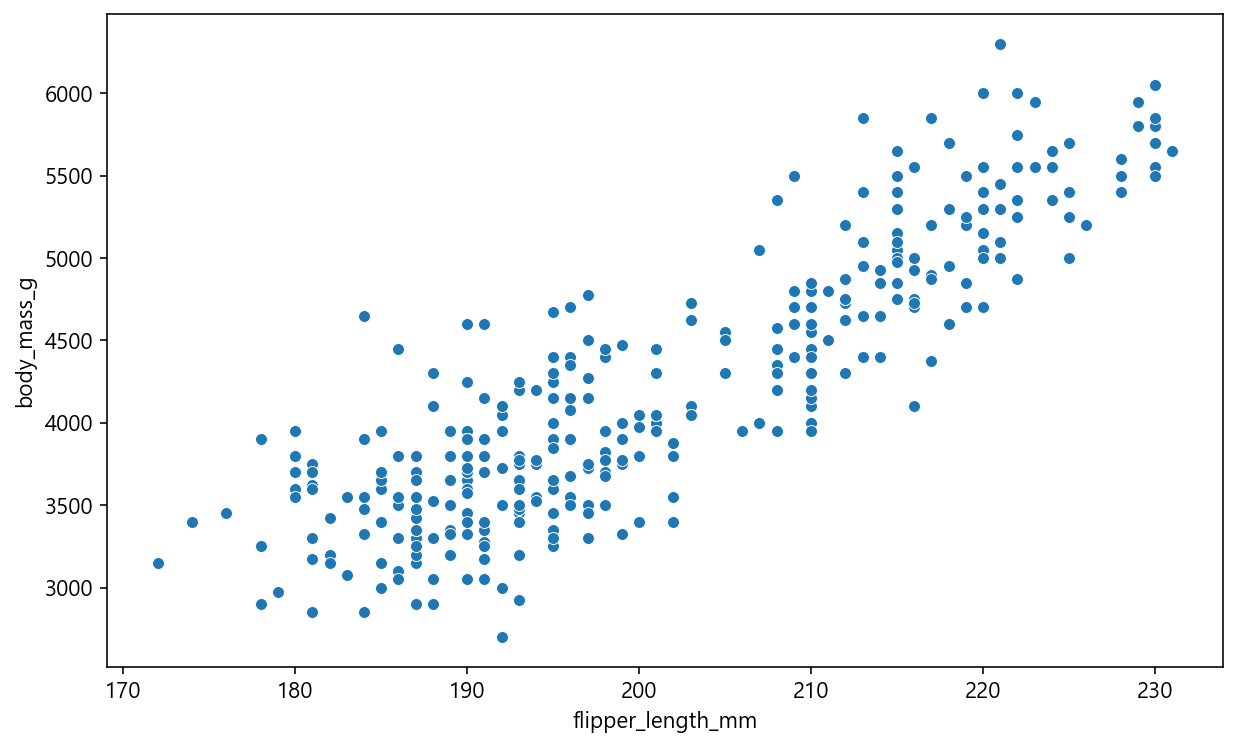

In [34]:
sns.scatterplot(x = 'flipper_length_mm', y = 'body_mass_g', data=df_penguins);

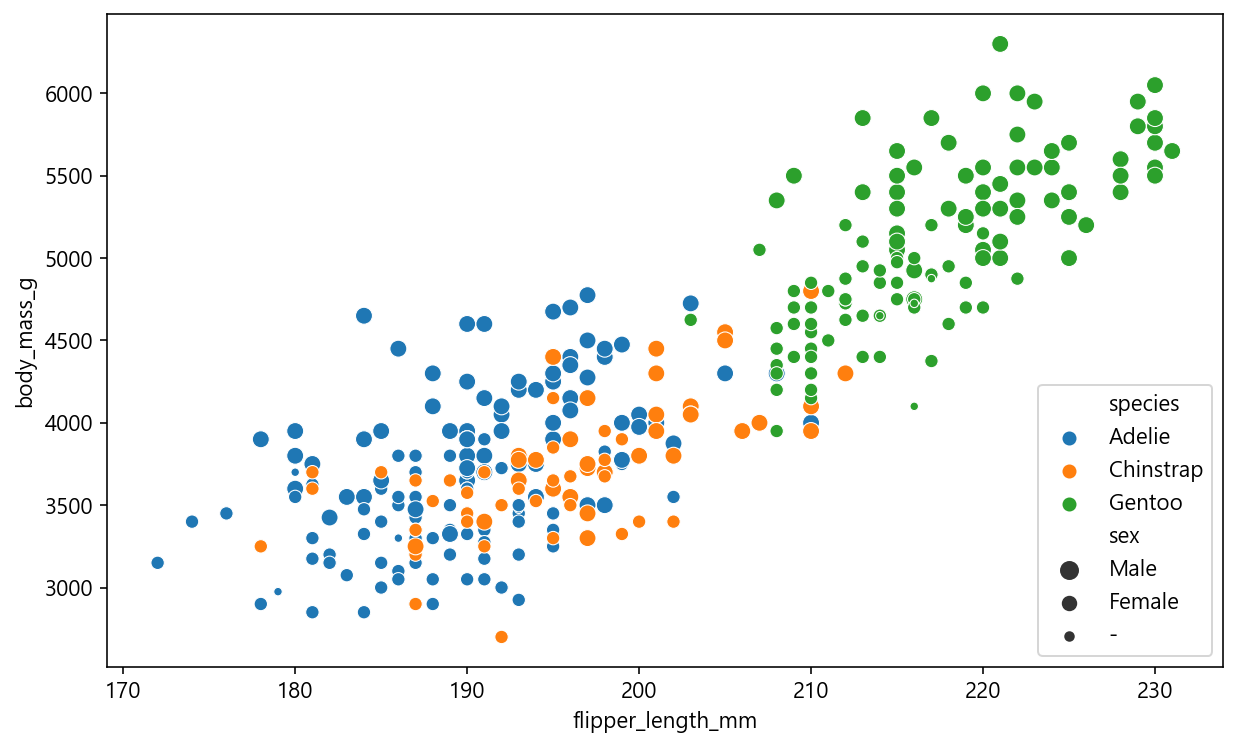

In [35]:
# 날개와 몸무게 산점도 (hue 추가)
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'flipper_length_mm', 
                y = 'body_mass_g', 
                data=df_penguins,
                size='sex',
                hue='species',
                );
plt.legend(loc='lower right')
plt.show()

### 관계 그래프
- sns.pairplot(data=데이타프레임, 옵션)
- 수치형 데이타의 산점도, 히스토그램 ... 등을 그리드 형태로 표시

In [36]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

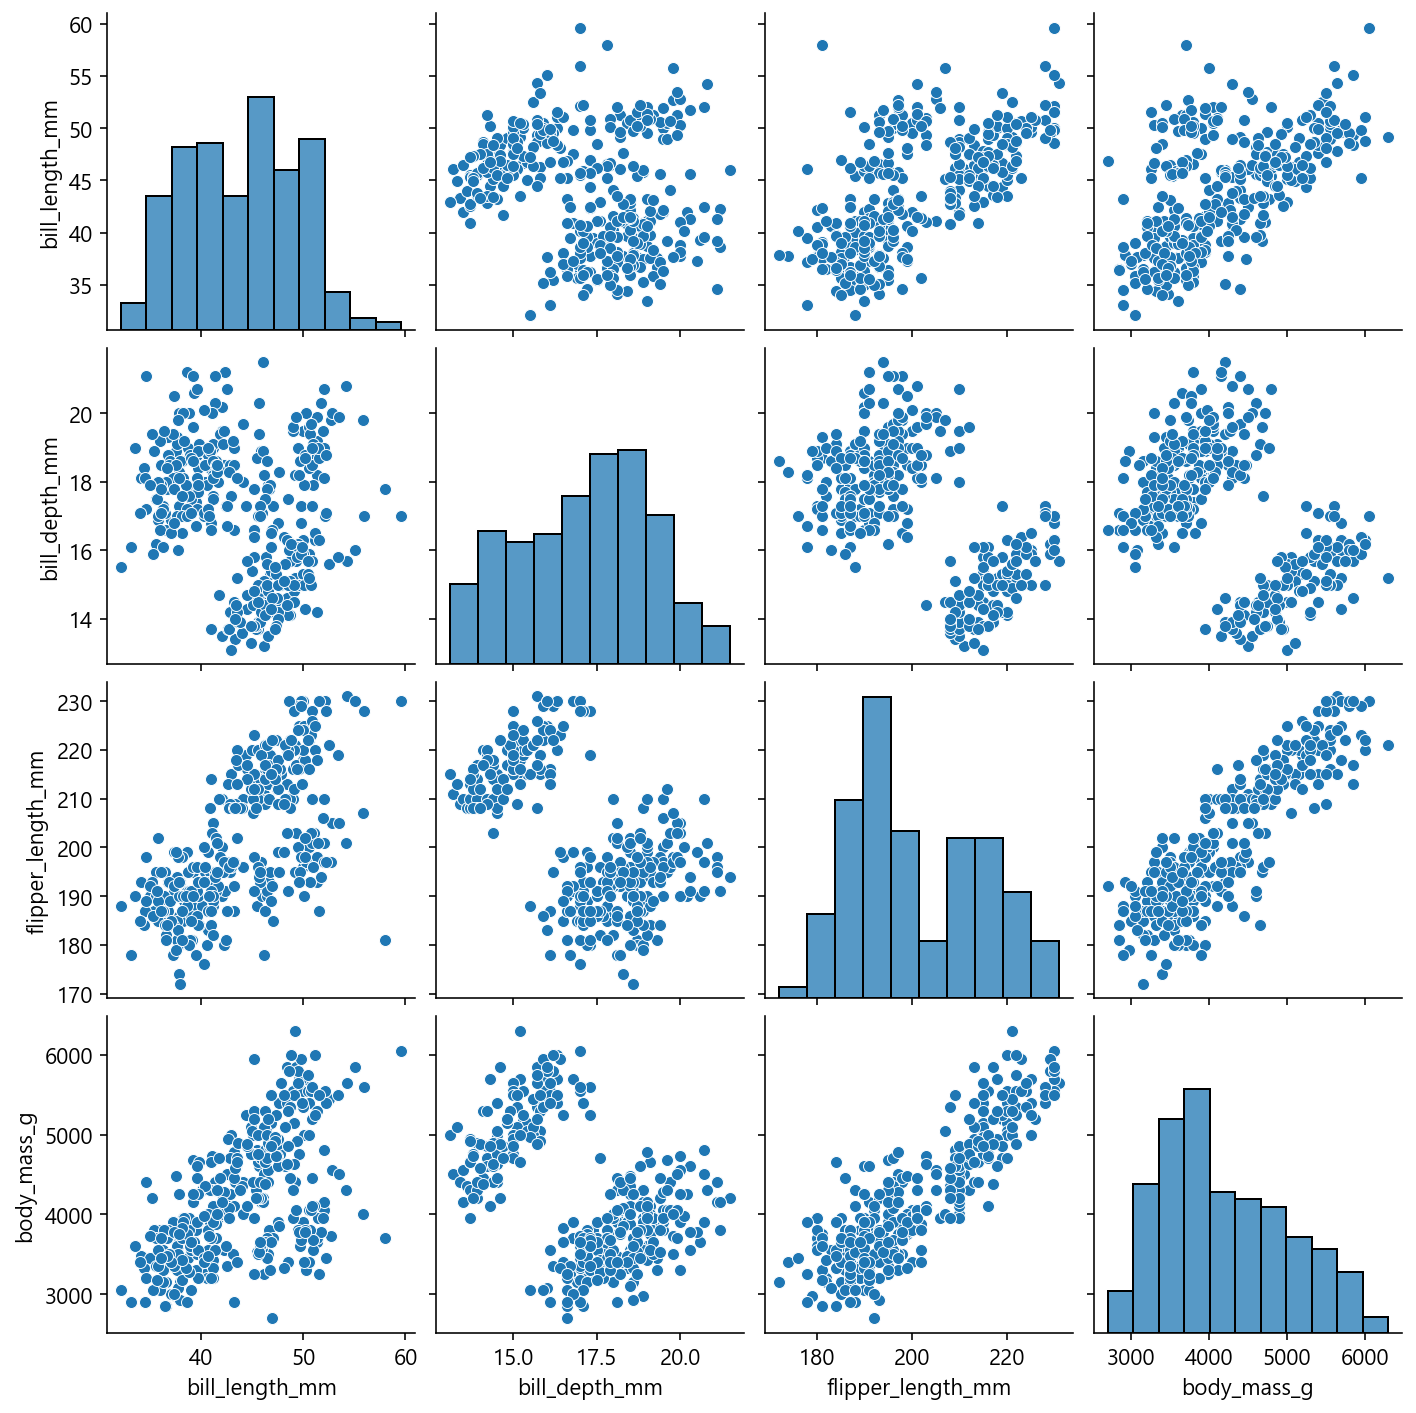

In [37]:
sns.pairplot(data=df_penguins)

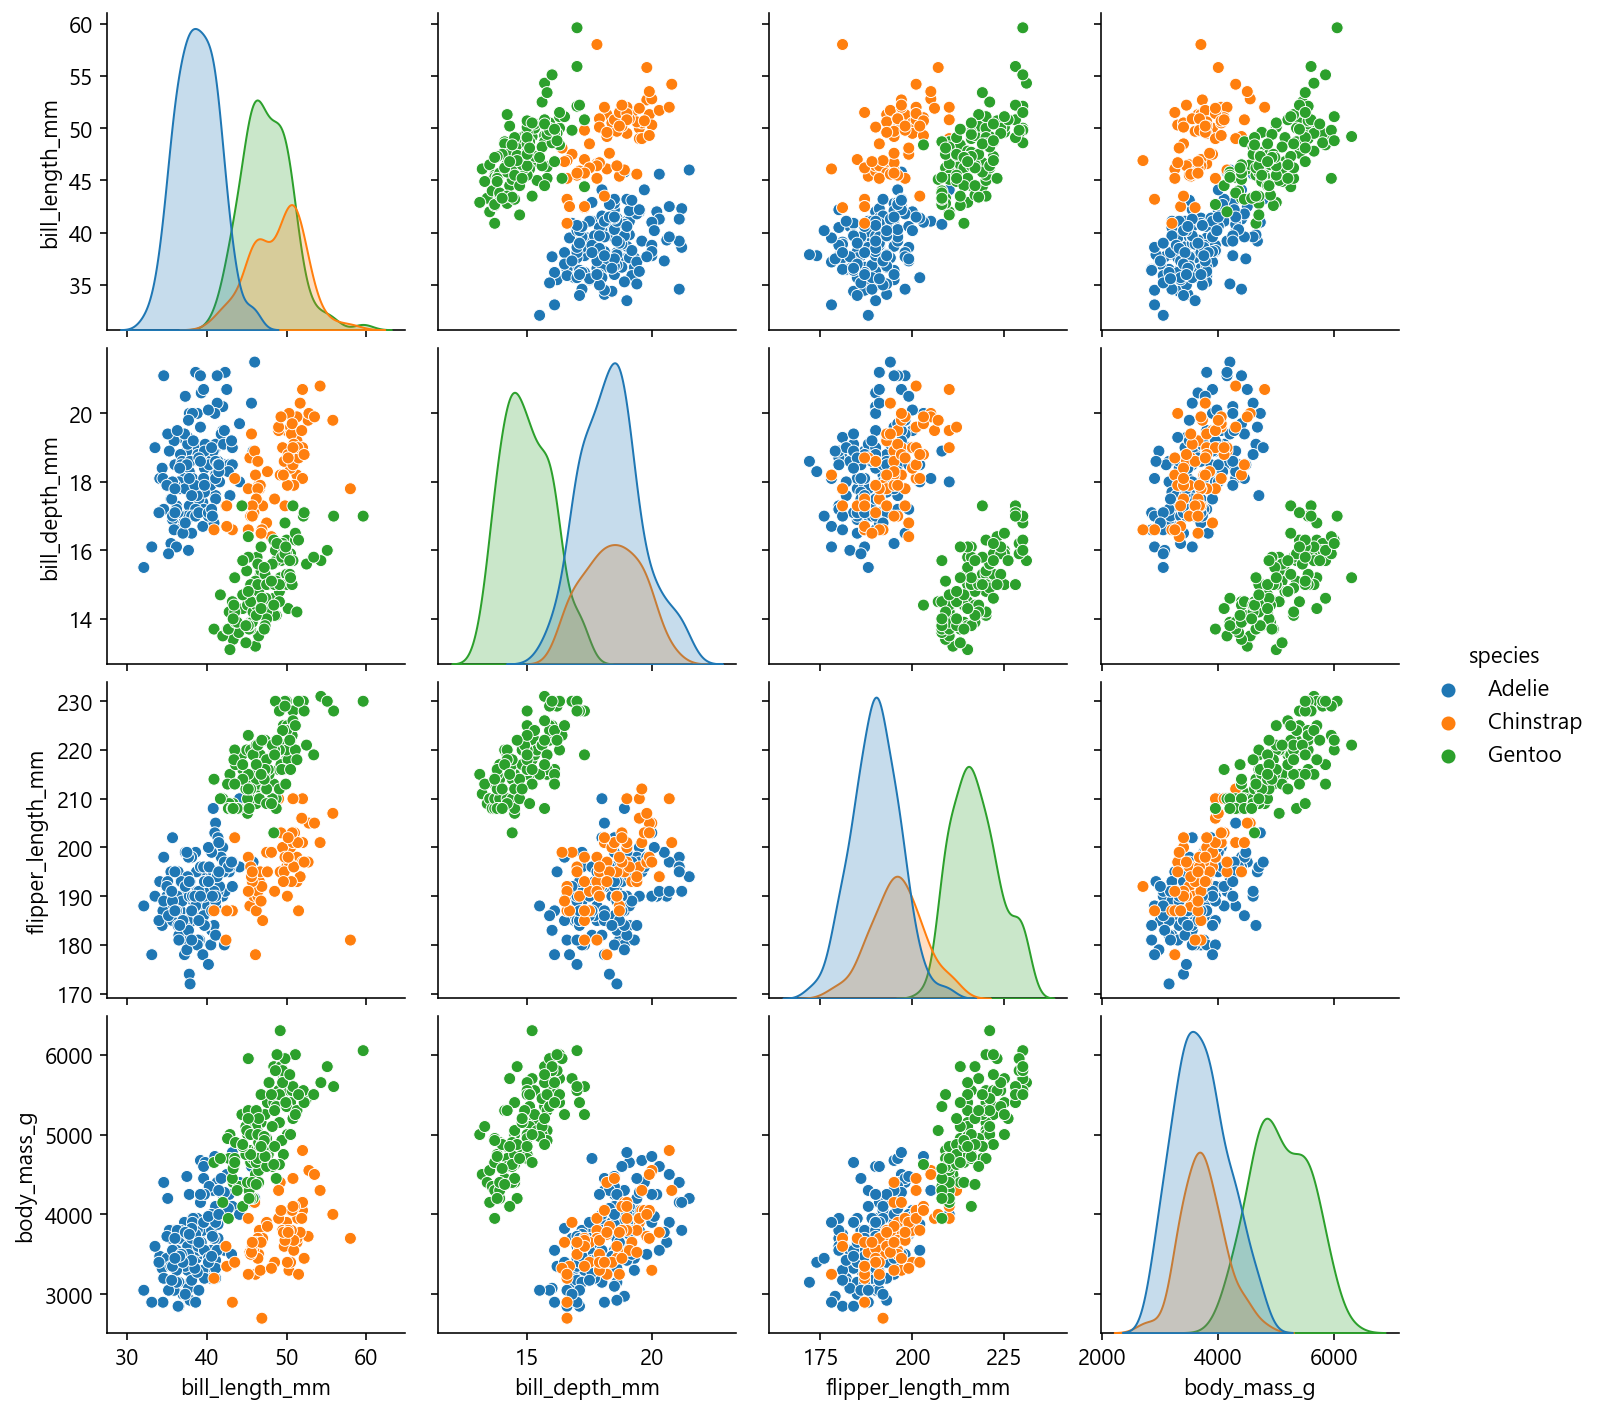

In [38]:
sns.pairplot(data=df_penguins, hue='species')

In [39]:
markers={'Adelie':'X','Chinstrap':'O','Gentoo':'V'}

ValueError: This `markers` argument was not understood: {''}

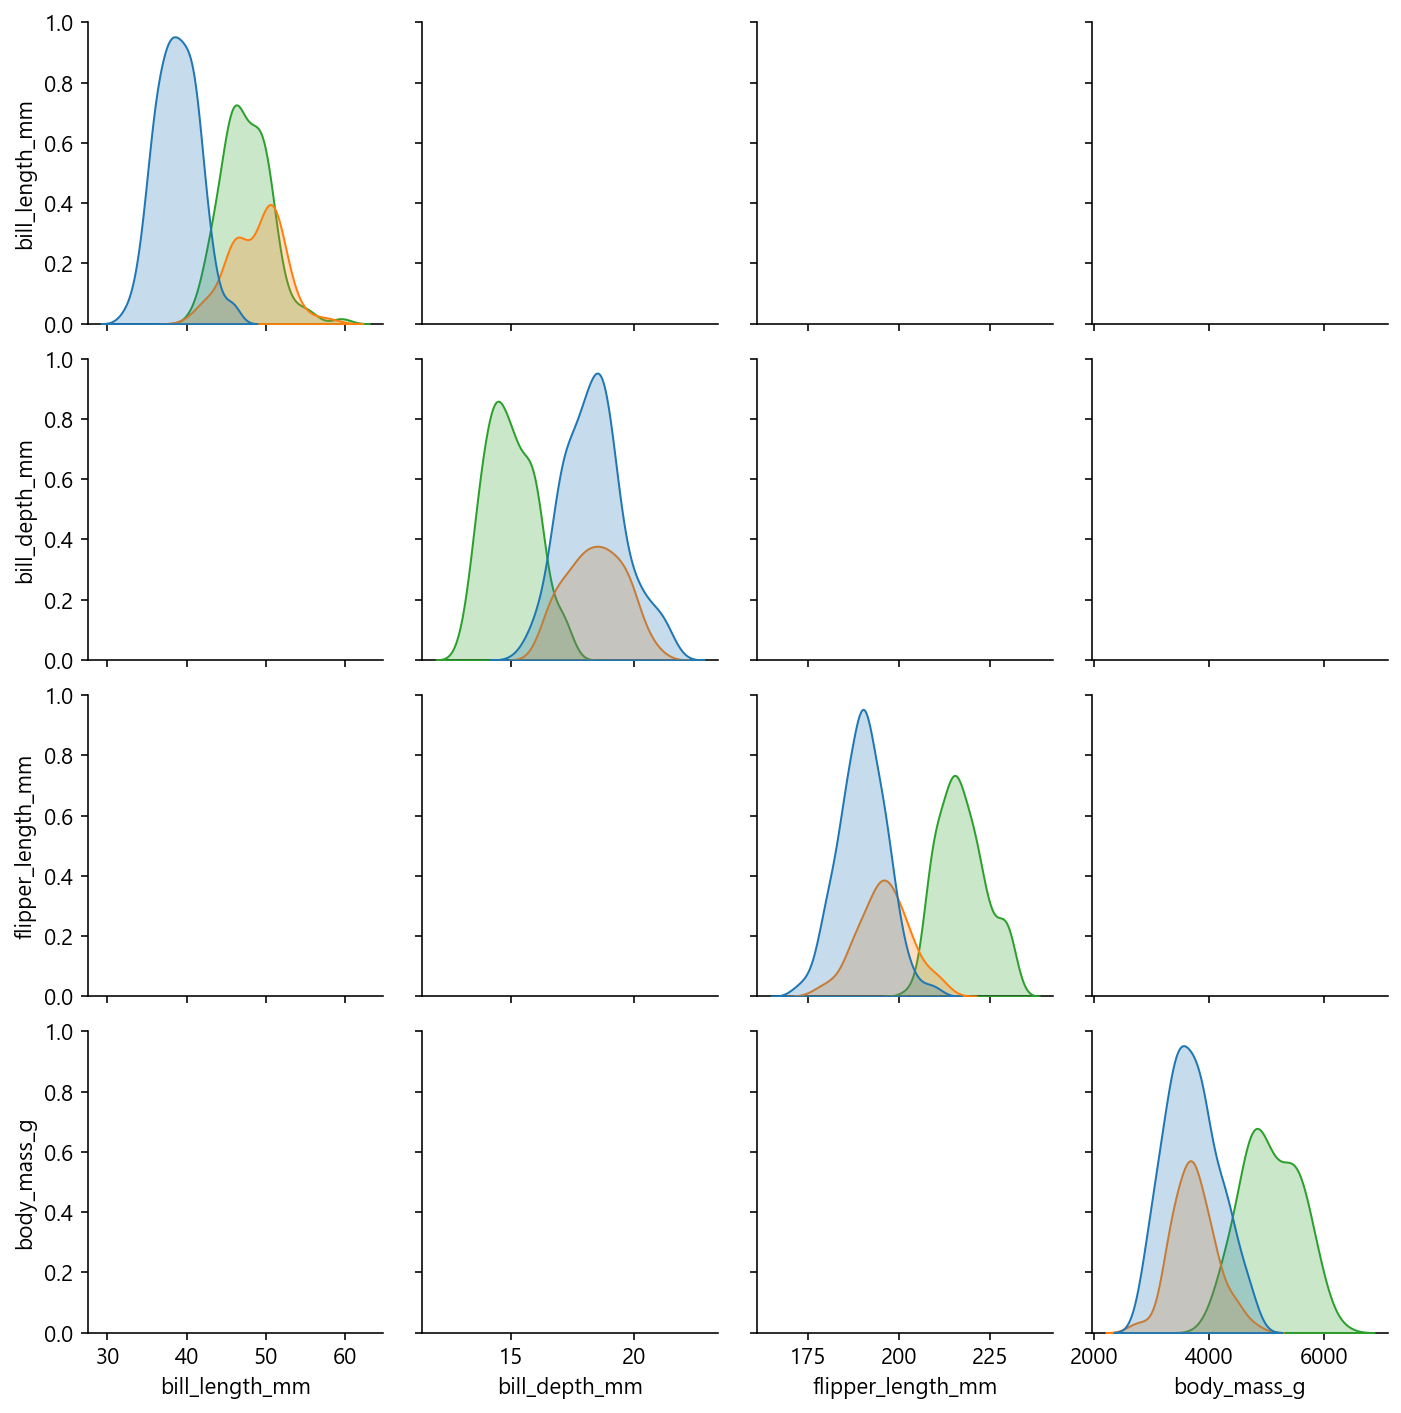

In [56]:
sns.pairplot(data=df_penguins, hue='species', markers={''})

### 조인트 플랏
- 수치형 데이타의 히스트그램 + 산점도
- sns.jointplot(x=컬럼명, y=컬럼명,data=데이타프레임)
- kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

In [55]:
sns.jointplot?

Signature:
sns.jointplot(
    *,
    x=None,
    y=None,
    data=None,
    kind='scatter',
    color=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset 

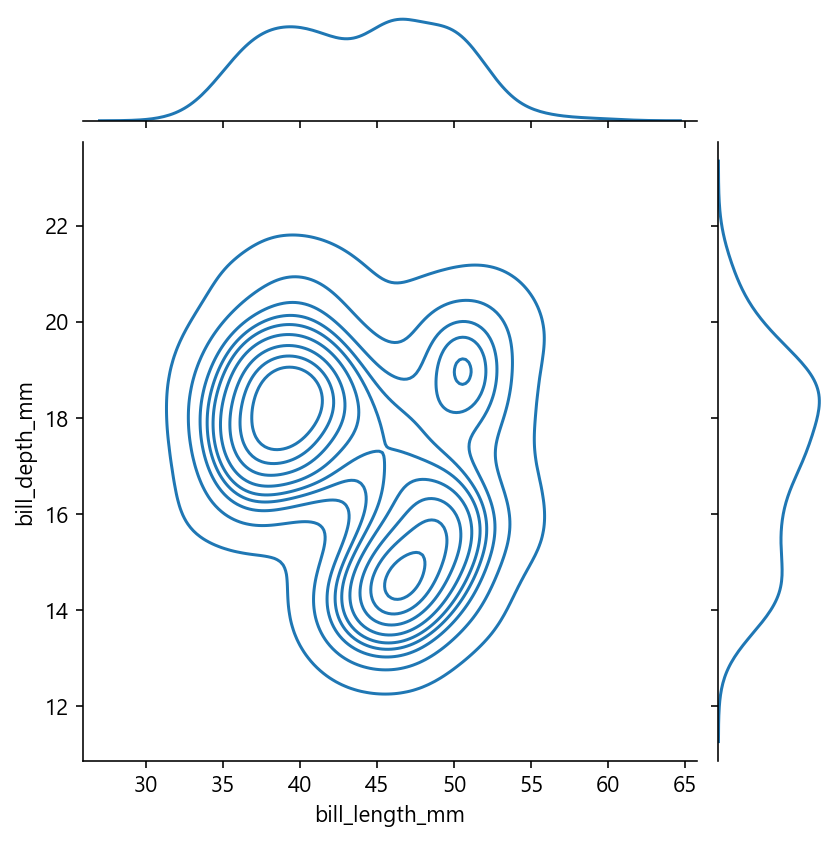

In [43]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_penguins, kind='kde')

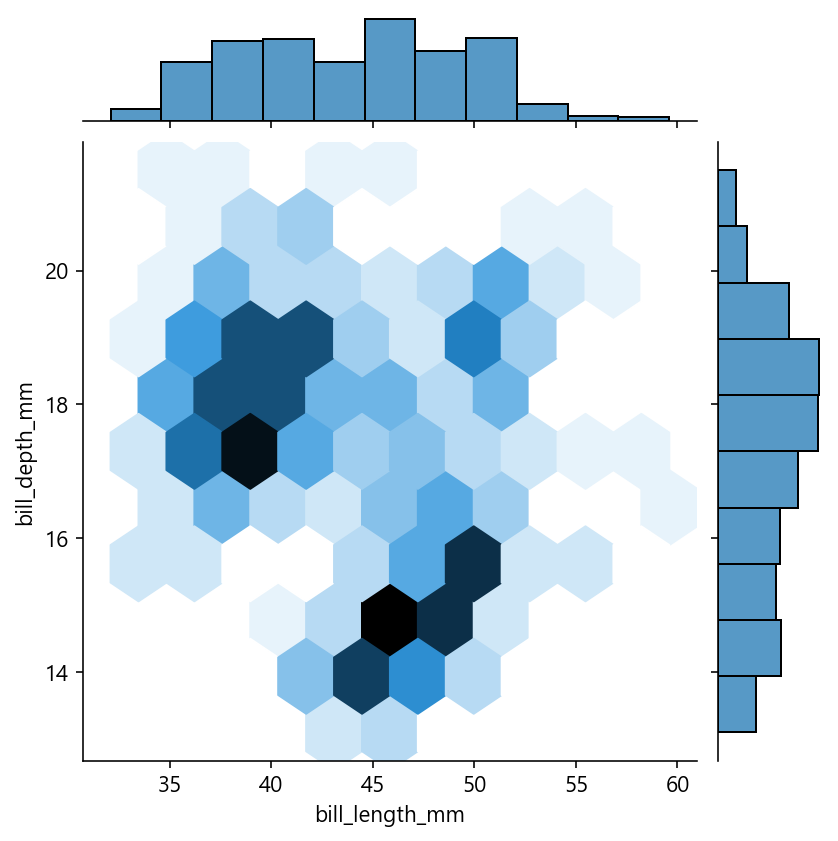

In [44]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_penguins, kind='hex')

### 히트맵(Heat Map)
- X축과 Y축에 2개의 범주형 자료값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는데 사용한다.
- sns.heatmap(data, op)

### 상관계수 구하기

- 데이타프레임명[[컬럼명1, 컬럼명2]].corr() => 데이타프레임

In [45]:
# 1) 데이타프레임 생성 
df_penguins = sns.load_dataset("penguins") 
# 2개의 결측 데이타 삭제 
df_penguins.drop(index=[3, 339], inplace=True)
df_penguins.shape

(342, 7)

In [46]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [47]:
# 상관계수 => flipper_length_mm + body_mass_g
df_penguins[['flipper_length_mm','body_mass_g']]

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
338,214.0,4925.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


In [48]:
df_penguins[['flipper_length_mm','body_mass_g']].corr()

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.871202
body_mass_g,0.871202,1.000000


In [49]:
# 상관계수값
df_penguins[['flipper_length_mm','body_mass_g']].corr().iloc[1,0]

0.871201767306011

In [50]:
df_penguins[['bill_length_mm','bill_depth_mm']].corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.235053
bill_depth_mm,-0.235053,1.000000


In [51]:
df_penguins[['bill_length_mm','body_mass_g']].corr()

,bill_length_mm,body_mass_g
bill_length_mm,1.00000,0.59511
body_mass_g,0.59511,1.00000


In [52]:
# 그래프화
df_corr = df_penguins[['flipper_length_mm','body_mass_g']].corr()
df_corr

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.871202
body_mass_g,0.871202,1.000000


In [53]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

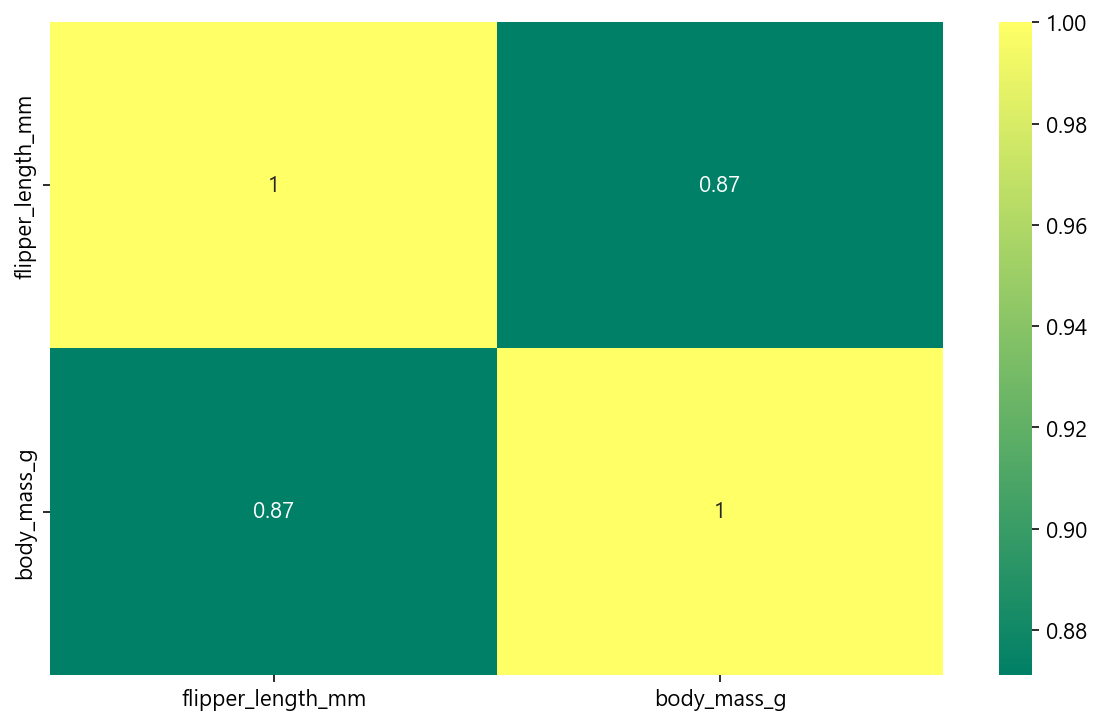

In [54]:
# 히트맵 그래프화
sns.heatmap(df_corr, annot=True, cmap='summer',);